In [1]:
#This notebook will run the soybean model for a given growing season (year)
#The agromanagement settings are defined within the config.py file

import sys, os
this_dir = os.getcwd()
up_dir = os.path.dirname(this_dir)
if not up_dir in sys.path:
    sys.path.append(up_dir)
    
import datetime as dt
import yaml
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

from pcse.input import ExcelWeatherDataProvider, PCSEFileReader
from pcse.input import NASAPowerWeatherDataProvider
from pcse.base import ParameterProvider
from campbell_diaz.model import CampbellDiazModel
import config

In [2]:
def make_agromanagement(year):
    """Returns the proper crop agromanagement dates for given campaign year

    :param year: The harvest year of the cropping season
    :return: the PCSE agromanagement structure
    """
    campaign_dates = config.agromanagement[year]
    agromanagement = """
    - {campaign_start_date}:
        CropCalendar:
            crop_name: Soybean 
            variety_name: Soybean 
            crop_start_date: {crop_start_date}
            crop_start_type: sowing
            crop_end_date: {crop_end_date}
            crop_end_type: harvest
            max_duration: 300
        TimedEvents:
        StateEvents:
        """
    agro = yaml.safe_load(agromanagement.format(**campaign_dates))
    return agro


In [3]:
def main(year):
    
    agro=make_agromanagement(year)
    #weather_data = ExcelWeatherDataProvider(config.weather_fname)
    weather_data =NASAPowerWeatherDataProvider(longitude=-57.079, latitude=-33.492)
    cropd = PCSEFileReader(config.crop_fname)
    soild = PCSEFileReader(config.soil_fname)
    params = ParameterProvider(cropdata=cropd, soildata=soild,sitedata={})
    model = CampbellDiazModel(params, weather_data, agro)
    model.run_till_terminate()
    output=model.get_output()
    
    df = pd.DataFrame(model.get_output()).set_index("day")
    
#    # Plot results
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8,8))
    for key, axis in zip(df.columns, axes.flatten()):
        df[key].plot(ax=axis, title=key)
    fig.autofmt_xdate()
        
    return model,output


--- Logging error ---
Traceback (most recent call last):
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\logging\handlers.py", line 179, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\Users\\javie\\.pcse\\logs\\pcse.log' -> 'C:\\Users\\javie\\.pcse\\logs\\pcse.log.1'
Call stack:
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\javie\.conda\envs\py3_pcse\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.la

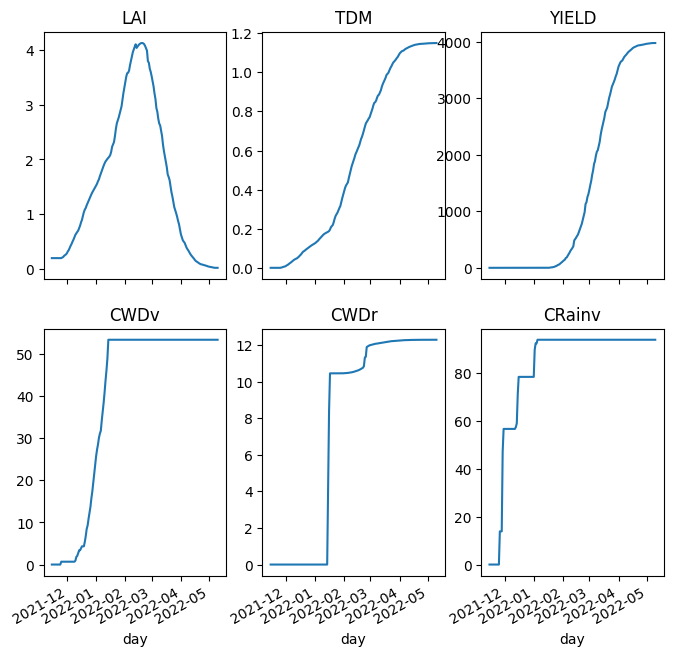

In [22]:
model,output=main(year=2022)

In [23]:

#print(type(output))
#num_days = len(output)

#print("Number of days:", num_days)
df = pd.DataFrame(output)

# Set 'day' as index if you want to plot it against dates
df.set_index('day', inplace=True)
df
# Plot the 'YIELD' column#
#df["YIELD"].plot(title="YIELD over Time")
#output

,LAI,TDM,YIELD,CWDv,CWDr,CRainv,CRainr,CVPDv,CVPDr,LAIR1,LAIR5,TDMR1,TDMR5,TWCR1,TWCR5,CTv,CTr,TWC,RADv,RADr
day,,,,,,,,,,,,,,,,,,,,
2021-11-15,0.200000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
2021-11-16,0.200000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,146.434124,0.000000,0.000000
2021-11-17,0.200000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,142.455206,0.000000,0.000000
2021-11-18,0.200000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,137.810220,0.000000,0.000000
2021-11-19,0.200000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,136.699592,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,0.026113,1.149750,3972.574822,53.4316,12.293756,93.911948,551.197265,95.760037,93.930908,2.033131,1.625679,1820.493261,9976.823794,53.458712,110.547314,85.264945,257.676626,137.654024,255.253201,577.371444
2022-05-07,0.023134,1.149971,3974.522273,53.4316,12.293756,93.911948,551.197265,95.760037,93.930908,2.033131,1.625679,1820.493261,9976.823794,53.458712,110.547314,85.264945,257.676626,137.208087,255.253201,577.371444
2022-05-08,0.023134,1.149971,3974.522273,53.4316,12.293756,93.911948,551.197265,95.760037,93.930908,2.033131,1.625679,1820.493261,9976.823794,53.458712,110.547314,85.264945,257.676626,136.816587,255.253201,577.371444


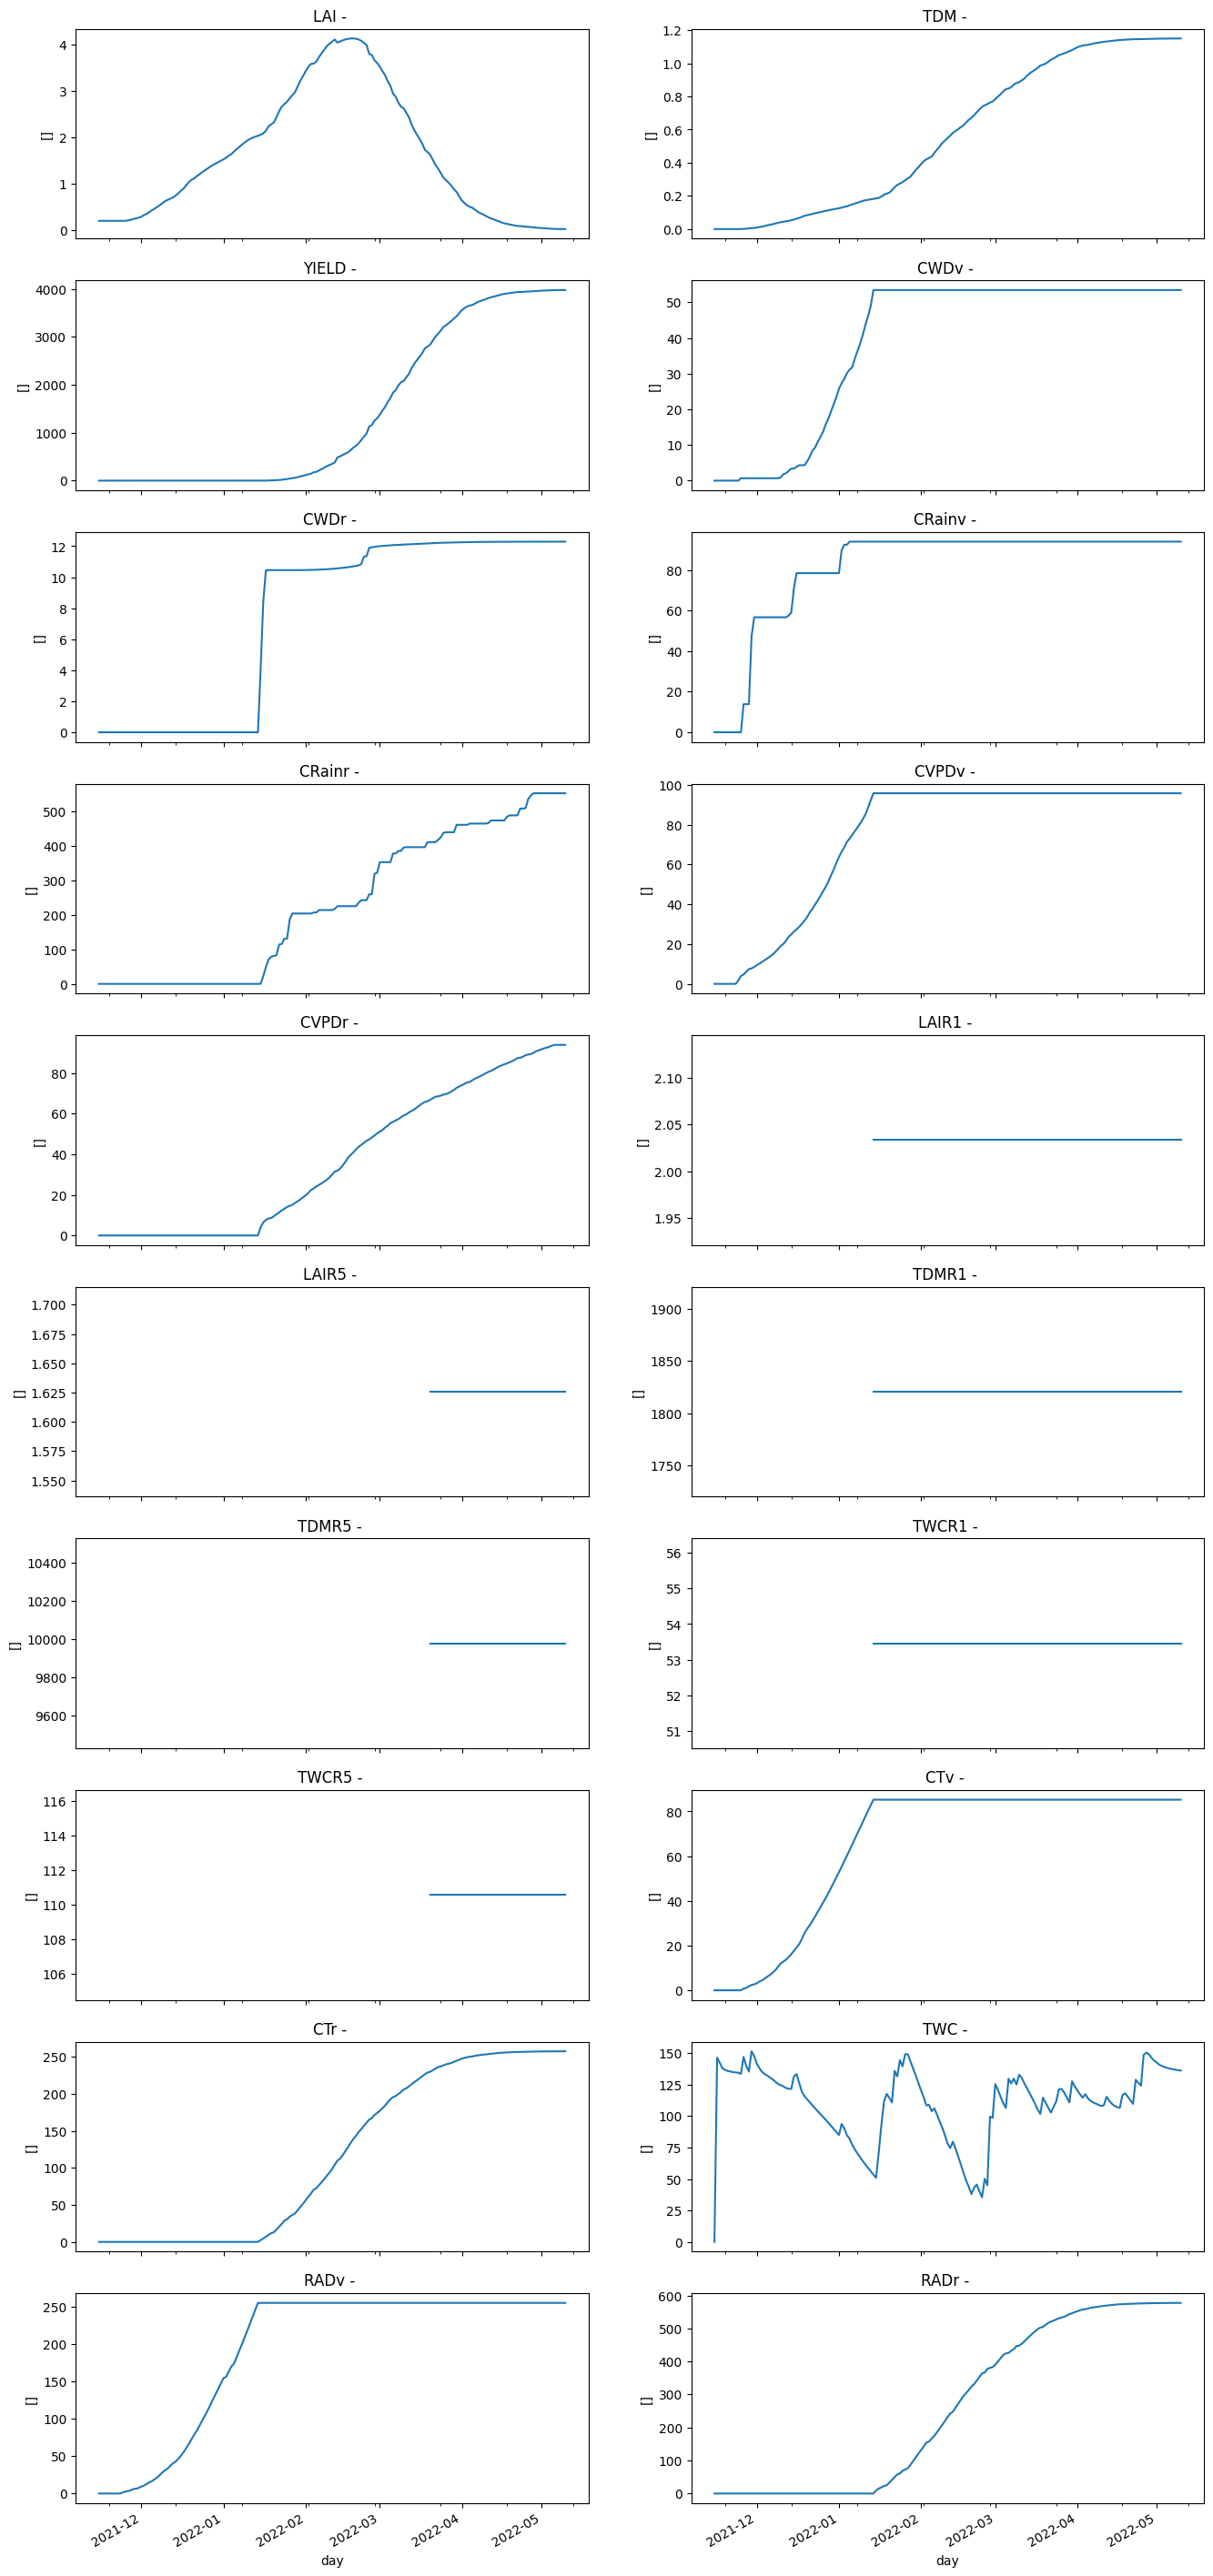

In [24]:
titles = {"LAI":("",""), 
          "TDM": ("",""),
          "YIELD":("",""),
          "CWDv":("",""),
          "CWDr":("",""),
          "CRainv":("",""),
          "CRainr":("",""),
          "CVPDv":("",""),
          "CVPDr":("",""),
          "LAIR1":("",""),
          "LAIR5":("",""),
          "TDMR1":("",""),
          "TDMR5":("",""),
          "TWCR1":("",""),
          "TWCR5":("",""),
          "CTv":("",""),
          "CTr":("",""),
          "TWC":("",""), 
          "RADv":("",""), 
          "RADr":("","")
}
          
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(16,40), sharex=True)
for key, axis in zip(df.columns, axes.flatten()):
    name, unit = titles[key]
    title = f"{key} - {name}"
    df[key].plot(ax=axis, title=title)
    axis.set_ylabel(f"[{unit}]")
fig.autofmt_xdate()